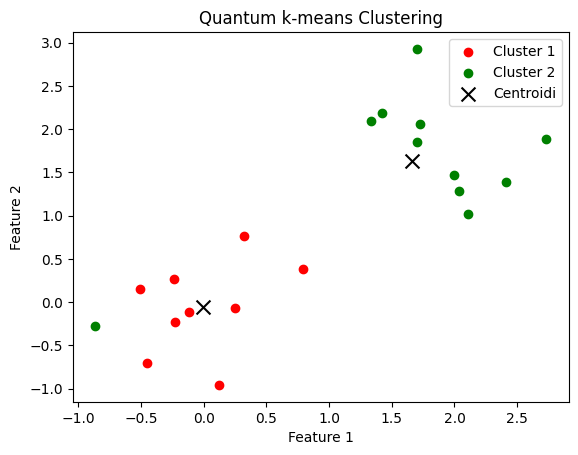

In [12]:
import pennylane as qml
import numpy as np
from copy import deepcopy
from numpy import pi
import matplotlib.pyplot as plt

# Configurazione del dispositivo
dev = qml.device('default.qubit', wires=3, shots=2000)

# Funzione per codificare i punti
def encode_points(point):
    a = (point[0] + 1) * pi / 2
    b = (point[1] + 1) * pi / 2
    return (a, b)

# Definizione del circuito quantistico per la distanza
@qml.qnode(dev)
def quantum_distance(point, center):
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)
    qml.Hadamard(wires=2)
    
    qml.U3(point[0], point[1], pi, wires=1)
    qml.U3(center[0], center[1], pi, wires=2)
    
    qml.CSWAP(wires=[0, 1, 2])
    qml.Hadamard(wires=0)
    
    return qml.sample(qml.PauliZ(0))

# Funzione per calcolare la distanza
def calculate_distance(point, center):
    result = quantum_distance(point, center)
    return np.sum(result == -1)

# Algoritmo Quantum k-means
def quantum_kmeans(data, k=2, max_iter=100, tolerance=0.01):
    n_samples = len(data)
    w_new = data[np.random.choice(n_samples, k, replace=False)]
    
    error = 1
    iteration = 0
    
    while error > tolerance and iteration < max_iter:
        w_old = deepcopy(w_new)
        clusters = np.zeros(n_samples)
        
        for i in range(n_samples):
            min_dist = float('inf')
            point = encode_points(data[i])
            
            for j in range(k):
                center = encode_points(w_old[j])
                dist = calculate_distance(point, center)
                
                if dist < min_dist:
                    min_dist = dist
                    clusters[i] = j

        for i in range(k):
            if np.sum(clusters == i) > 0:
                w_new[i] = np.mean(data[clusters == i], axis=0)
        
        error = np.linalg.norm(w_new - w_old)
        iteration += 1
    
    return w_new, clusters

# Funzione per il plot dei cluster
def plot_clusters(data, centers, assignments, k=2):
    colors = ['r', 'g', 'b', 'c', 'm', 'y']  # Definire i colori per i cluster
    for i in range(k):
        points = data[assignments == i]
        plt.scatter(points[:, 0], points[:, 1], c=colors[i], label=f'Cluster {i+1}')
    
    # Plot dei centri dei cluster
    plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='x', s=100, label='Centroidi')

    plt.title('Quantum k-means Clustering')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

# Generazione di dati per il clustering
np.random.seed(42)
n_samples = 20
cluster1 = np.random.normal(0, 0.5, (n_samples//2, 2))
cluster2 = np.random.normal(2, 0.5, (n_samples//2, 2))
data = np.vstack([cluster1, cluster2])

# Esecuzione dell'algoritmo quantum k-means
final_centers, cluster_assignments = quantum_kmeans(data)

# Plot dei cluster
plot_clusters(data, final_centers, cluster_assignments)


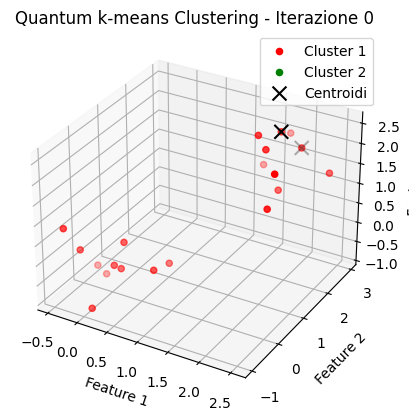

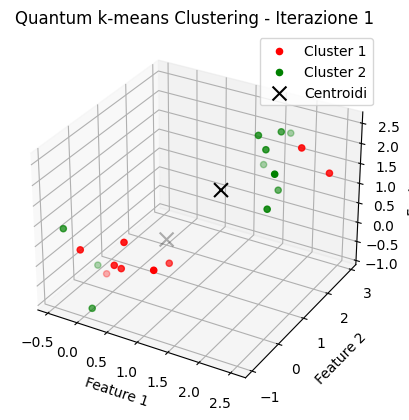

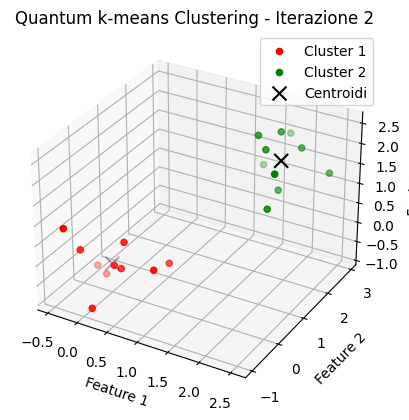

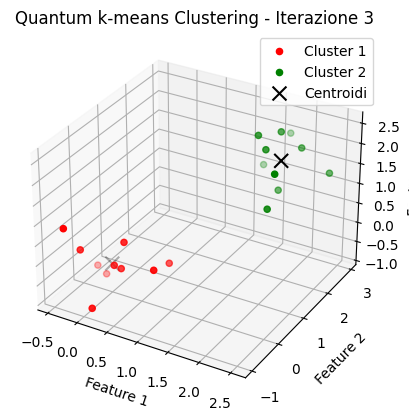

In [14]:
import pennylane as qml
import numpy as np
from copy import deepcopy
from numpy import pi
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  

dev = qml.device('default.qubit', wires=4, shots=2000)

def encode_points(point):
    a = (point[0] + 1) * pi / 2
    b = (point[1] + 1) * pi / 2
    c = (point[2] + 1) * pi / 2
    return (a, b, c)


@qml.qnode(dev)
def quantum_distance(point, center):
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)
    qml.Hadamard(wires=2)
    qml.Hadamard(wires=3)
    
    qml.U3(point[0], point[1], pi, wires=1)
    qml.U3(center[0], center[1], pi, wires=2)
    
    qml.U3(point[2], 0, pi, wires=3)
    qml.U3(center[2], 0, pi, wires=3)
    
    qml.CSWAP(wires=[0, 1, 2])
    qml.Hadamard(wires=0)
    
    return qml.sample(qml.PauliZ(0))


def calculate_distance(point, center):
    result = quantum_distance(point, center)
    return np.sum(result == -1)


def plot_clusters_3d_iteration(data, centers, assignments, iteration, k=2):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    colors = ['r', 'g', 'b', 'c', 'm', 'y']
    for i in range(k):
        points = data[assignments == i]
        ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=colors[i], label=f'Cluster {i+1}')
    
    ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], c='black', marker='x', s=100, label='Centroidi')

    ax.set_title(f'Quantum k-means Clustering - Iterazione {iteration}')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    plt.legend()
    plt.show()

def quantum_kmeans(data, k=2, max_iter=100, tolerance=0.04):
    n_samples = len(data)
    w_new = data[np.random.choice(n_samples, k, replace=False)]
    
    error = 1
    iteration = 0
    clusters = np.zeros(n_samples)
    
    plot_clusters_3d_iteration(data, w_new, clusters, iteration, k)
    
    while error > tolerance and iteration < max_iter:
        w_old = deepcopy(w_new)
        
        for i in range(n_samples):
            min_dist = float('inf')
            point = encode_points(data[i])
            
            for j in range(k):
                center = encode_points(w_old[j])
                dist = calculate_distance(point, center)
                
                if dist < min_dist:
                    min_dist = dist
                    clusters[i] = j

        for i in range(k):
            if np.sum(clusters == i) > 0:
                w_new[i] = np.mean(data[clusters == i], axis=0)
        
        error = np.linalg.norm(w_new - w_old)
        iteration += 1
        
        plot_clusters_3d_iteration(data, w_new, clusters, iteration, k)
    
    return w_new, clusters

np.random.seed(42)
n_samples = 20
cluster1 = np.random.normal(0, 0.5, (n_samples//2, 3))
cluster2 = np.random.normal(2, 0.5, (n_samples//2, 3))
data = np.vstack([cluster1, cluster2])

final_centers, cluster_assignments = quantum_kmeans(data)
